# Imports

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import statsmodels.formula.api as smf

# Importing the Dataset

In [2]:
raw_df = pd.read_csv('../raw_data/data_first_cleaning.csv')
raw_df

,address,garage-places,price,rooms,square-meters,neighborhood,city,latitude,longitude
0,"Avenida Raja Gabaglia, 1583",1,330000,1,40,Luxemburgo,Belo Horizonte,-19.936415,-43.953396
1,"Rua dos Expedicionários, 1082",5,1190000,4,411,Santa Amélia,Belo Horizonte,-20.225241,-44.397780
2,"Rua Marechal Hermes, 81",4,1590000,4,158,Gutierrez,Belo Horizonte,-19.937155,-43.958694
3,"Rua Juruna, 110",6,550000,3,278,Pindorama,Belo Horizonte,-19.912982,-44.019944
4,"Rua Maria Pereira de Araújo, 15",1,450000,3,87,Castelo,Belo Horizonte,-19.886147,-44.004236
...,...,...,...,...,...,...,...,...,...
5758,Rua Gama Cerqueira,2,560000,3,92,Nova Suíssa,Belo Horizonte,-19.945428,-43.970988
5759,"Rua Arthur Lourenço, 262",1,440000,3,90,Barreiro,Belo Horizonte,-19.979915,-44.026007
5760,Rua General Ephigênio Ruas Santos,2,500000,3,80,Itapoã,Belo Horizonte,-19.840904,-43.956037
5761,Rua General Ephigênio Ruas Santos,2,740000,3,80,Itapoã,Belo Horizonte,-19.840904,-43.956037


Creating a copy of the main Dataset, so we don't mess the original.

In [3]:
df = raw_df.copy()

Checking the main structure of the data 

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5763 entries, 0 to 5762
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   address        5763 non-null   object 
 1   garage-places  5763 non-null   int64  
 2   price          5763 non-null   int64  
 3   rooms          5763 non-null   int64  
 4   square-meters  5763 non-null   int64  
 5   neighborhood   5763 non-null   object 
 6   city           5763 non-null   object 
 7   latitude       5763 non-null   float64
 8   longitude      5763 non-null   float64
dtypes: float64(2), int64(4), object(3)
memory usage: 405.3+ KB


# Evaluating the correlation between features

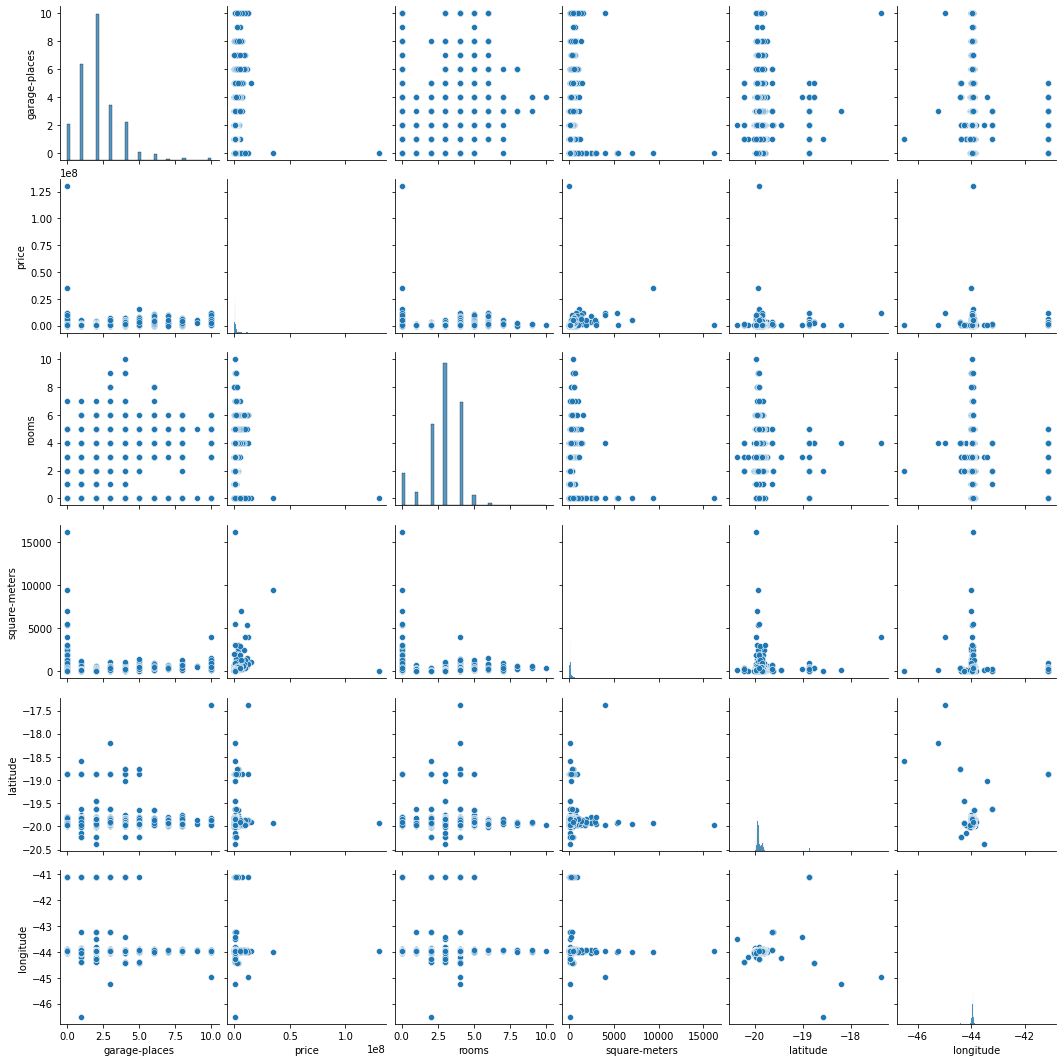

In [5]:
sns.pairplot(df);

Since our target is the **PRICE**, let's see how each feature influences it.

This step is also helpful to identify (and maybe, delete) some **outliers** in the dataset.

## Price x SQM

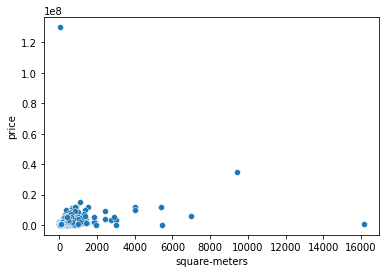

In [6]:
sns.scatterplot(x=df['square-meters'], y=df['price']);

In [7]:
sorted(df['price'], reverse=True)

[130000000,
 35000000,
 15000000,
 12000000,
 11990000,
 11900000,
 11900000,
 11800000,
 11500000,
 11000000,
 10000000,
 10000000,
 9500000,
 9500000,
 9295000,
 9295000,
 8950000,
 8856000,
 8700000,
 8578000,
 8500000,
 8500000,
 8200000,
 8000000,
 8000000,
 8000000,
 8000000,
 7500000,
 7250000,
 7200000,
 7000000,
 7000000,
 6900000,
 6900000,
 6900000,
 6700000,
 6700000,
 6700000,
 6600000,
 6600000,
 6500000,
 6500000,
 6500000,
 6500000,
 6500000,
 6405157,
 6405157,
 6405156,
 6300000,
 6200000,
 6000000,
 6000000,
 6000000,
 6000000,
 5980000,
 5980000,
 5950000,
 5950000,
 5950000,
 5900000,
 5900000,
 5900000,
 5900000,
 5900000,
 5900000,
 5900000,
 5900000,
 5800000,
 5600000,
 5600000,
 5500000,
 5500000,
 5500000,
 5500000,
 5500000,
 5500000,
 5500000,
 5500000,
 5500000,
 5500000,
 5500000,
 5490000,
 5400000,
 5320000,
 5263200,
 5224500,
 5100000,
 5045940,
 5013020,
 5000000,
 5000000,
 5000000,
 5000000,
 5000000,
 5000000,
 5000000,
 4990000,
 4950000,
 495000

In [8]:
df = df[df['price'] < 35000000] #130000000 and 35000000 were to price outliers
df = df[df['price'] > 10000] #Some values were incorrectly inputed, so let's assume 10K will be the lowest price

In [9]:
df = df[df['square-meters'] > 0] #Some values with 0 square meters were still here

In [10]:
sorted(df['square-meters'], reverse=True)

[16153,
 7000,
 5447,
 5388,
 4000,
 4000,
 3000,
 3000,
 2884,
 2736,
 2400,
 2399,
 1940,
 1892,
 1833,
 1830,
 1830,
 1500,
 1460,
 1430,
 1400,
 1370,
 1352,
 1333,
 1332,
 1300,
 1285,
 1250,
 1240,
 1216,
 1215,
 1200,
 1200,
 1200,
 1114,
 1110,
 1100,
 1100,
 1075,
 1050,
 1017,
 1007,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 973,
 960,
 913,
 900,
 895,
 889,
 853,
 850,
 840,
 825,
 820,
 820,
 804,
 800,
 800,
 800,
 784,
 779,
 764,
 763,
 760,
 750,
 739,
 730,
 730,
 727,
 724,
 720,
 720,
 720,
 707,
 706,
 700,
 700,
 700,
 700,
 700,
 700,
 700,
 690,
 690,
 680,
 668,
 660,
 659,
 655,
 653,
 652,
 650,
 650,
 650,
 650,
 650,
 639,
 638,
 637,
 637,
 635,
 632,
 630,
 628,
 627,
 625,
 620,
 620,
 620,
 620,
 620,
 620,
 608,
 605,
 600,
 600,
 600,
 600,
 600,
 600,
 600,
 600,
 600,
 600,
 600,
 600,
 600,
 600,
 600,
 595,
 595,
 589,
 584,
 584,
 580,
 580,
 575,
 574,
 574,
 574,
 574,
 572,
 570,
 570,
 565,
 5

In [11]:
df = df[df['square-meters'] < 16153] #16153 is the major square-meter outlier 

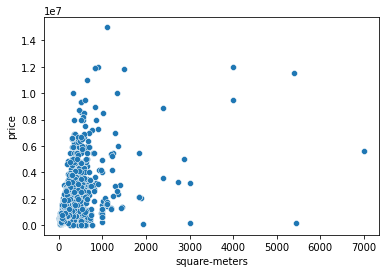

In [12]:
sns.scatterplot(x=df['square-meters'], y=df['price']);

After removing the outliers, we can see that we still have some records that might influence the direction of your correlation line. Since we are dealing with houses and apartments, and knowing that we might find houses with more than 1500 sqm, let's exclude those records to have a more consistent database.

In [13]:
df = df[df['square-meters'] < 1500]

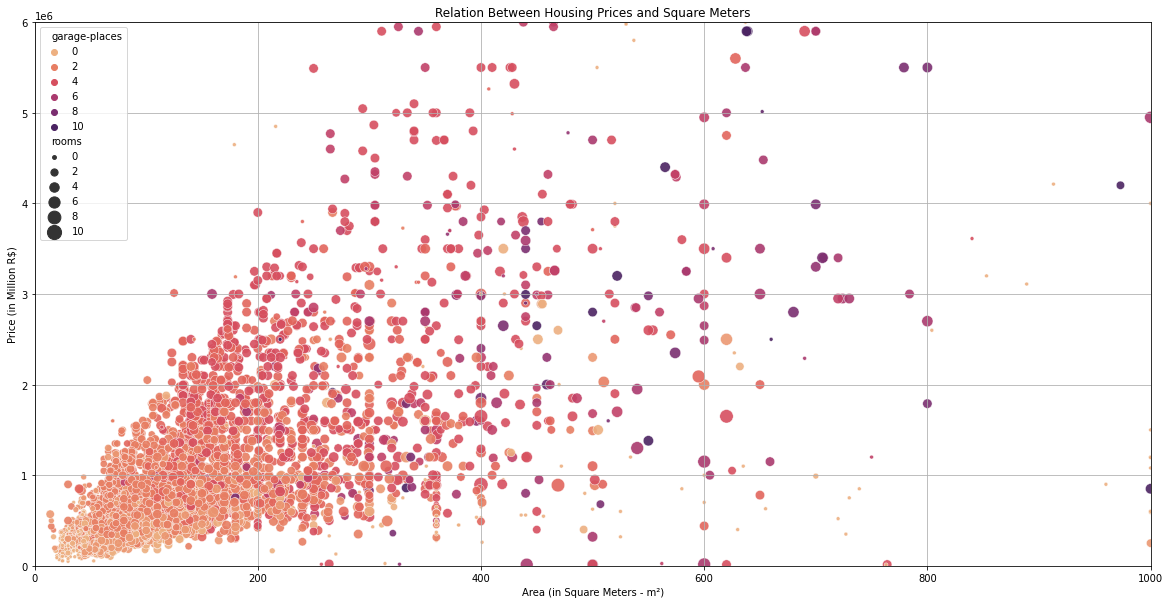

In [15]:
plt.figure(figsize=(20, 10));
sns.scatterplot(x=df['square-meters'], 
                y=df['price'], 
                hue=df['garage-places'], 
                size=df['rooms'], 
                sizes=(15,200),
                legend='auto', 
                palette='flare', 
                alpha=0.9);
plt.grid();
plt.xlim(0, 1000);
plt.ylim(0, 6_000_000);
plt.xlabel('Area (in Square Meters - m²)');
plt.ylabel('Price (in Million R$)');
plt.title('Relation Between Housing Prices and Square Meters');

Now we can see more clearly the correlation between **Price** and **Square-Meters**, and it is **very relevant**!

## Price x Rooms

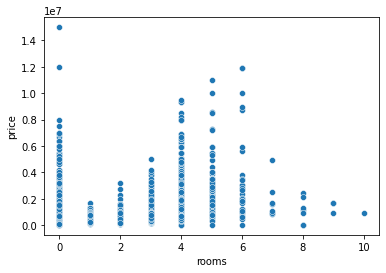

In [16]:
sns.scatterplot(x=df['rooms'], y=df['price']);

**MAIN INSIGHTS**:
- There's a lot of **'zero rooms'** houses. Probably, those records refer to stores or commercial points.
- Naturally more rooms tends to lead to a greater area = higher price. However, if a house have more than 5 rooms, we might assume we are dealing with a big house, in which other features might have a bigger impact on the price level (total estate area and location, for example).

## Price x Garage

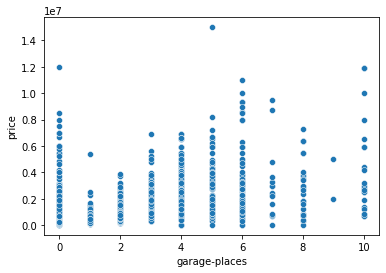

In [17]:
sns.scatterplot(x=df['garage-places'], y=df['price']);

**MAIN INSIGHTS**:
- There's a lot of **'zero garage'** houses. However, this doesn't seems to be a problem, since we do often find houses that do not have any garage spaces (maybe they're too old, or maybe even too new).
- Naturally more garages = higher price. However, just like we dealt with the rooms, if a house have more than 6 garage spaces, we might assume we are dealing with a big house, in which other features might have a bigger impact on the price level (total estate area and location, for example).

## General Correlation

In [18]:
df.corr()

,garage-places,price,rooms,square-meters,latitude,longitude
garage-places,1.000000,0.567080,0.503099,0.452477,-0.015434,-0.000148
price,0.567080,1.000000,0.290252,0.630184,-0.002923,0.087680
rooms,0.503099,0.290252,1.000000,0.235867,-0.008471,0.010337
square-meters,0.452477,0.630184,0.235867,1.000000,0.027060,0.026273
latitude,-0.015434,-0.002923,-0.008471,0.027060,1.000000,0.743498
longitude,-0.000148,0.087680,0.010337,0.026273,0.743498,1.000000


We can clearly see that **PRICE** is directly correlated with **SQUARE METERS**, **GARAGE PLACES** and **ROOMS**.

To continue with a simple approach, let's drop every feature regarding neighborhoods and location in general. We might use those features on deeper analysis.

In [19]:
df.drop(columns=['address', 'neighborhood', 'city', 'latitude', 'longitude'], inplace=True)
df.rename(columns = {'garage-places':'garage', 'square-meters':'sqm'}, inplace = True)
df

,garage,price,rooms,sqm
0,1,330000,1,40
1,5,1190000,4,411
2,4,1590000,4,158
3,6,550000,3,278
4,1,450000,3,87
...,...,...,...,...
5758,2,560000,3,92
5759,1,440000,3,90
5760,2,500000,3,80
5761,2,740000,3,80


In [20]:
#Saving the cleaned dataset as a new CSV at the 'raw_data' folder
#index=False, so it won't create a new index in addition to the existing one
df.to_csv('../raw_data/data_for_first_model.csv', index=False)

# StatsModels Analysis

## Price x SQM

In [21]:
model = smf.ols(formula = 'price ~ sqm', data=df).fit()

In [22]:
model.params
#For each new squaremeter, the price raises (on average) $4,689 BRL.

Intercept    282787.110692
sqm            4708.016409
dtype: float64

In [23]:
model.summary()
#The R-squared tells us the positive relation between the features
#The low P-Value ensures the statistically significance related to the null hypothesis

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.397
Model:                            OLS   Adj. R-squared:                  0.397
Method:                 Least Squares   F-statistic:                     3721.
Date:                Tue, 05 Jul 2022   Prob (F-statistic):               0.00
Time:                        13:54:54   Log-Likelihood:                -85176.
No. Observations:                5651   AIC:                         1.704e+05
Df Residuals:                    5649   BIC:                         1.704e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.828e+05   1.66e+04     17.056      0.000     2.5e+05    3.15e+05
sqm         4708.0164     77.178     61.002      0.000    4556.717    4859.316
==============================================================================
Omnibus:                     3047.187   Durbin-Watson:                   1.930
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            92585.661
Skew:                           2.003   Prob(JB):                         0.00
Kurtosis:                      22.421   Cond. No.                         315.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [24]:
predicted_prices = model.predict(df['sqm'])
residuals = predicted_prices - df['price']

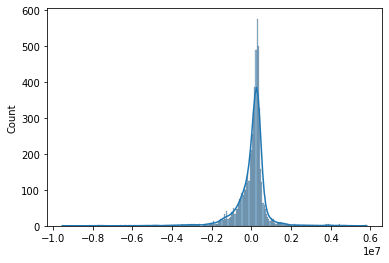

In [25]:
sns.histplot(residuals, kde=True);
#The model isn't perfect yet. The curve is slightly skewed towards +0.2

## Price x Rooms

In [26]:
model = smf.ols(formula = 'price ~ rooms', data=df).fit()

In [27]:
model.params
#For each new room, the price raises (on average) $254K BRL.

Intercept    292466.780434
rooms        256480.570143
dtype: float64

In [28]:
model.summary()
#The R-squared tells us the positive relation between the features (but lighter than the SQM relation)
#The low P-Value ensures the statistically significance related to the null hypothesis

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.084
Model:                            OLS   Adj. R-squared:                  0.084
Method:                 Least Squares   F-statistic:                     519.7
Date:                Tue, 05 Jul 2022   Prob (F-statistic):          4.04e-110
Time:                        13:54:56   Log-Likelihood:                -86357.
No. Observations:                5651   AIC:                         1.727e+05
Df Residuals:                    5649   BIC:                         1.727e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.925e+05   3.49e+04      8.379      0.000    2.24e+05    3.61e+05
rooms       2.565e+05   1.13e+04     22.797      0.000    2.34e+05    2.79e+05
==============================================================================
Omnibus:                     4881.981   Durbin-Watson:                   1.951
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           176390.165
Skew:                           4.035   Prob(JB):                         0.00
Kurtosis:                      29.153   Cond. No.                         8.45
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [29]:
predicted_prices = model.predict(df['rooms'])
residuals = predicted_prices - df['price']

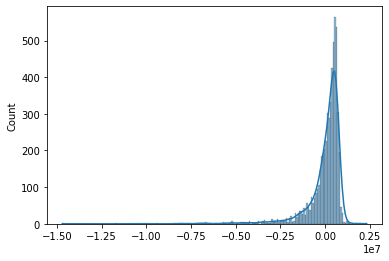

In [30]:
sns.histplot(residuals, kde=True);
#The model isn't perfect yet. The curve is slightly skewed towards +0.25

## Price x Garages

In [31]:
model = smf.ols(formula = 'price ~ garage', data=df).fit()

In [32]:
model.params
#For each new garage, the price raises (on average) $431K BRL.

Intercept    106652.975303
garage       433559.649221
dtype: float64

In [33]:
model.summary()
#The R-squared tells us the positive relation between the features (almost like the SQM relation)
#The low P-Value ensures the statistically significance related to the null hypothesis

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.322
Model:                            OLS   Adj. R-squared:                  0.321
Method:                 Least Squares   F-statistic:                     2678.
Date:                Tue, 05 Jul 2022   Prob (F-statistic):               0.00
Time:                        13:54:58   Log-Likelihood:                -85509.
No. Observations:                5651   AIC:                         1.710e+05
Df Residuals:                    5649   BIC:                         1.710e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.067e+05   2.14e+04      4.989      0.000    6.47e+04    1.49e+05
garage      4.336e+05   8378.527     51.747      0.000    4.17e+05     4.5e+05
==============================================================================
Omnibus:                     4796.895   Durbin-Watson:                   1.964
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           220126.696
Skew:                           3.820   Prob(JB):                         0.00
Kurtosis:                      32.606   Cond. No.                         5.04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [34]:
predicted_prices = model.predict(df['garage'])
residuals = predicted_prices - df['price']

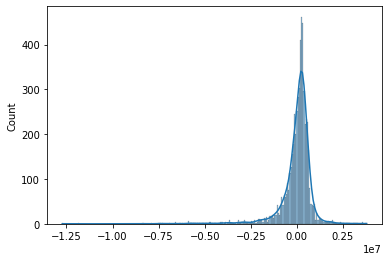

In [35]:
sns.histplot(residuals, kde=True);
#The model isn't perfect yet, but it is more balanced than the last ones

## Price x (SQM + Garage + Rooms)

In [36]:
model = smf.ols(formula = 'price ~ sqm + garage + rooms', data=df).fit()

In [37]:
model.params
#For each new squaremeter, the price raises (on average) $3,487 BRL.
#For each new garage, the price raises (on average) $270K BRL.
#The values are more balanced now
#But the rooms are weird here...

Intercept   -103722.000923
sqm            3509.489750
garage       270490.834825
rooms          1289.327551
dtype: float64

In [38]:
model.summary()
#The R-squared tells us the positive relation between the features (the highest one so far)
#The low P-Value ensures the statistically significance related to the null hypothesis...
#...However the 'rooms' are not adding any significance

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.497
Model:                            OLS   Adj. R-squared:                  0.497
Method:                 Least Squares   F-statistic:                     1861.
Date:                Tue, 05 Jul 2022   Prob (F-statistic):               0.00
Time:                        13:55:00   Log-Likelihood:                -84664.
No. Observations:                5651   AIC:                         1.693e+05
Df Residuals:                    5647   BIC:                         1.694e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.037e+05   2.65e+04     -3.909      0.000   -1.56e+05   -5.17e+04
sqm         3509.4898     79.064     44.388      0.000    3354.494    3664.485
garage      2.705e+05   9098.146     29.730      0.000    2.53e+05    2.88e+05
rooms       1289.3276   9649.690      0.134      0.894   -1.76e+04    2.02e+04
==============================================================================
Omnibus:                     3509.143   Durbin-Watson:                   1.927
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           130467.985
Skew:                           2.398   Prob(JB):                         0.00
Kurtosis:                      26.046   Cond. No.                         570.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [39]:
predicted_prices = model.predict(df[['sqm', 'garage', 'rooms']])
residuals = predicted_prices - df['price']

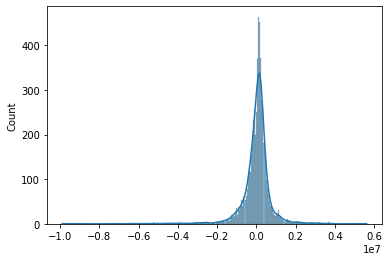

In [40]:
sns.histplot(residuals, kde=True);
#Seems balanced!
#But let's try WITHOUT the 'rooms'...

## Price x (SQM + Garage)

In [41]:
model = smf.ols(formula = 'price ~ sqm + garage', data=df).fit()

In [42]:
model.params
#Same values as before

Intercept   -101246.668738
sqm            3509.602512
garage       271046.845115
dtype: float64

In [43]:
model.summary()
#The R-squared didn't change
#The P-Value still low

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.497
Model:                            OLS   Adj. R-squared:                  0.497
Method:                 Least Squares   F-statistic:                     2791.
Date:                Tue, 05 Jul 2022   Prob (F-statistic):               0.00
Time:                        13:55:02   Log-Likelihood:                -84664.
No. Observations:                5651   AIC:                         1.693e+05
Df Residuals:                    5648   BIC:                         1.694e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.012e+05    1.9e+04     -5.331      0.000   -1.38e+05    -6.4e+04
sqm         3509.6025     79.052     44.396      0.000    3354.629    3664.576
garage       2.71e+05   8090.003     33.504      0.000    2.55e+05    2.87e+05
==============================================================================
Omnibus:                     3506.601   Durbin-Watson:                   1.927
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           130351.802
Skew:                           2.395   Prob(JB):                         0.00
Kurtosis:                      26.036   Cond. No.                         409.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [44]:
predicted_prices = model.predict(df[['sqm', 'garage']])
residuals = predicted_prices - df['price']

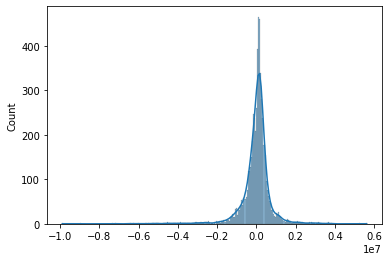

In [45]:
sns.histplot(residuals, kde=True);
#Looks good!
#The majority of predictions presented a low variation when compared to the actual values

## Conclusion

Using the **StatsModels** tool we were able to see the correlation and statistical significance between the surface (in square meters) of a house, its garage spaces and its final price.  